In [ ]:
import warnings as Nws_Fkewss
Nws_Fkewss.filterwarnings("ignore")
import pandas as Nws_Fkepnn

In [ ]:
Nws_Fke = Nws_Fkepnn.read_csv('purr_FA-KES-Dataset.csv', encoding='unicode_escape')
Nws_Fke

,article_content,labels
0,wed apr syria attack symptoms consistent nerve...,0
1,fri apr homs governor says u attack caused dea...,0
2,sun apr death toll aleppo bomb attack least de...,0
3,wed apr aleppo bomb blast kills six syrian sta...,0
4,sun jul syria rebels dead fighting key aleppo ...,0
...,...,...
793,turkish bombardment kills civilians syria turk...,1
794,martyrs terrorists shell aleppos salah eddin s...,1
795,chemical attack kills five syrians aleppo sana...,0
796,killed russian military chopper shot syria fiv...,1


In [ ]:
Nws_Fke['labels'].value_counts()

1    423
0    375
Name: labels, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as Nws_Fkefid

Nws_Fke_anl = Nws_Fkefid(analyzer='char', ngram_range= (1,1))
Nws_Fke_x = Nws_Fke_anl.fit_transform(Nws_Fke['article_content'].values.astype('U')).toarray()

In [ ]:
print(Nws_Fke_x)

[[0.49834614 0.34500886 0.03184724 ... 0.01669601 0.07224908 0.00296566]
 [0.5257263  0.36434055 0.06166889 ... 0.         0.07100073 0.01929548]
 [0.52844823 0.33529129 0.09926659 ... 0.00539682 0.07662973 0.        ]
 ...
 [0.49609548 0.29837627 0.03989181 ... 0.01064682 0.06118975 0.00945582]
 [0.49691628 0.21605056 0.03632528 ... 0.01066444 0.09373916 0.00473573]
 [0.50391308 0.35312091 0.04236227 ... 0.00847963 0.06497917 0.02259318]]


In [ ]:
Nws_Fke_y = Nws_Fke['labels']

In [ ]:
from imblearn.over_sampling import SMOTE as Nws_Fke_sme
from collections import Counter as Nws_Fke_cttr
print('Original Nws_Fke datashape %s' % Nws_Fke_cttr(Nws_Fke_y))
Nws_Fke_MM = Nws_Fke_sme()
Nws_Fke_x, Nws_Fke_y = Nws_Fke_MM.fit_resample(Nws_Fke_x, Nws_Fke_y)
print('Resampled Nws_Fke datashape %s' % Nws_Fke_cttr(Nws_Fke_y))


Original Nws_Fke datashape Counter({0: 423, 1: 423})
Resampled Nws_Fke datashape Counter({0: 423, 1: 423})


In [ ]:
Nws_Fke_x.shape

(846, 27)

In [ ]:
Nws_Fke_y.shape

(846,)

In [ ]:
from sklearn.model_selection import train_test_split as Nws_Fkennes

Nws_si =0.4
Nws_rs = 31
Nws_sii =0.5

In [ ]:
Nws_Fke_xN, Nws_Fke_xS, Nws_Fke_yN, Nws_Fke_yS = Nws_Fkennes(Nws_Fke_x, Nws_Fke_y, test_size=Nws_si, random_state= Nws_rs)
Nws_Fke_xV, Nws_Fke_xS, Nws_Fke_yV, Nws_Fke_yS = Nws_Fkennes(Nws_Fke_xS, Nws_Fke_yS, test_size= Nws_sii, random_state= Nws_rs)

print(Nws_Fke_xN.shape)
print(Nws_Fke_xV.shape)
print(Nws_Fke_xS.shape)

(507, 27)
(169, 27)
(170, 27)


### Linear ML models

In [ ]:
from sklearn.metrics import classification_report as Nws_Fkeclc
from sklearn.metrics import confusion_matrix as Nws_Fkecos
from sklearn.metrics import ConfusionMatrixDisplay as Nws_Fkecud
from sklearn.model_selection import GridSearchCV as Nws_Fkegrs
import time as Nws_Fketme

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression as Nws_Fkelst

Nws_parm = { 'penalty': ['l2','l1','elasticnet',None],
               'solver': ['lbfgs','sag','saga','liblinear'],
               'C':[1.0,2.0,3.0,4.0]}


Nws_parm_Vo = Nws_Fkelst(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 64 candidates, totalling 128 fits
[CV 1/2; 1/64] START C=1.0, penalty=l2, solver=lbfgs............................
[CV 1/2; 1/64] END C=1.0, penalty=l2, solver=lbfgs;, score=0.660 total time=   0.0s
[CV 2/2; 1/64] START C=1.0, penalty=l2, solver=lbfgs............................
[CV 2/2; 1/64] END C=1.0, penalty=l2, solver=lbfgs;, score=0.500 total time=   0.0s
[CV 1/2; 2/64] START C=1.0, penalty=l2, solver=sag..............................
[CV 1/2; 2/64] END C=1.0, penalty=l2, solver=sag;, score=0.660 total time=   0.0s
[CV 2/2; 2/64] START C=1.0, penalty=l2, solver=sag..............................
[CV 2/2; 2/64] END C=1.0, penalty=l2, solver=sag;, score=0.500 total time=   0.0s
[CV 1/2; 3/64] START C=1.0, penalty=l2, solver=saga.............................
[CV 1/2; 3/64] END C=1.0, penalty=l2, solver=saga;, score=0.660 total time=   0.0s
[CV 2/2; 3/64] START C=1.0, penalty=l2, solver=saga.............................
[CV 2/2; 3/64] END C=1.0, penalty=l2,


 training period: 0.07146930694580078 

              precision    recall  f1-score   support

           0       0.47      0.41      0.44        82
           1       0.51      0.56      0.53        87

    accuracy                           0.49       169
   macro avg       0.49      0.49      0.49       169
weighted avg       0.49      0.49      0.49       169


 validation period: 0.17863035202026367 



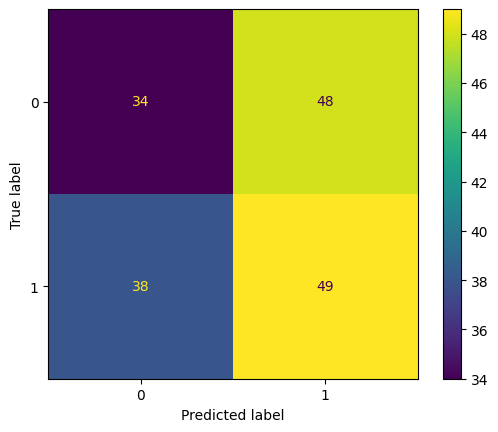

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl1= Nws_Fkelst(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl1.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl1.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.43      0.38      0.40        88
           1       0.41      0.48      0.44        82

    accuracy                           0.42       170
   macro avg       0.42      0.43      0.42       170
weighted avg       0.42      0.42      0.42       170


 testing period: 0.2822227478027344 



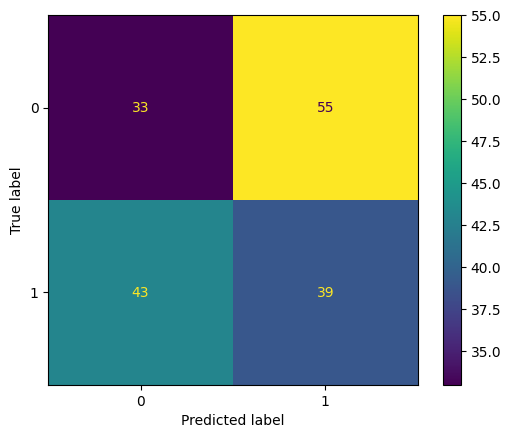

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl1.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### Passive Aggressive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier as Nws_Fkepvag

Nws_parm = { 'C': [1.0,3.0,5.0,6.0,7.0],
               'max_iter': [1000,1100,1200,1300],
               'tol':[1e-3,1e-4,1e-5,1e-6,1e-7]}


Nws_parm_Vo = Nws_Fkepvag(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2; 1/100] START C=1.0, max_iter=1000, tol=0.001...........................
[CV 1/2; 1/100] END C=1.0, max_iter=1000, tol=0.001;, score=0.520 total time=   0.0s
[CV 2/2; 1/100] START C=1.0, max_iter=1000, tol=0.001...........................
[CV 2/2; 1/100] END C=1.0, max_iter=1000, tol=0.001;, score=0.500 total time=   0.0s
[CV 1/2; 2/100] START C=1.0, max_iter=1000, tol=0.0001..........................
[CV 1/2; 2/100] END C=1.0, max_iter=1000, tol=0.0001;, score=0.520 total time=   0.0s
[CV 2/2; 2/100] START C=1.0, max_iter=1000, tol=0.0001..........................
[CV 2/2; 2/100] END C=1.0, max_iter=1000, tol=0.0001;, score=0.500 total time=   0.0s
[CV 1/2; 3/100] START C=1.0, max_iter=1000, tol=1e-05...........................
[CV 1/2; 3/100] END C=1.0, max_iter=1000, tol=1e-05;, score=0.520 total time=   0.0s
[CV 2/2; 3/100] START C=1.0, max_iter=1000, tol=1e-05...........................
[CV 2/2; 3/100] END C=1.


 training period: 0.0033571720123291016 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.51      1.00      0.68        87

    accuracy                           0.51       169
   macro avg       0.26      0.50      0.34       169
weighted avg       0.27      0.51      0.35       169


 validation period: 0.17035651206970215 



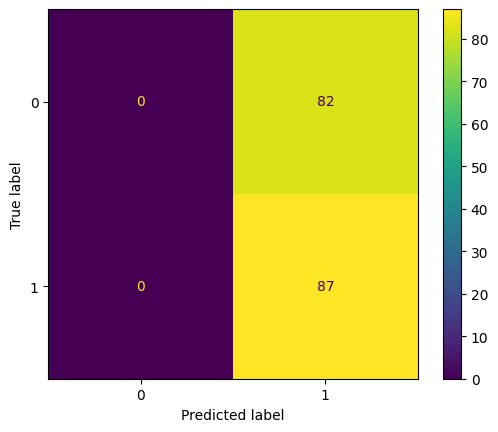

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl2= Nws_Fkepvag(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl2.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl2.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.48      1.00      0.65        82

    accuracy                           0.48       170
   macro avg       0.24      0.50      0.33       170
weighted avg       0.23      0.48      0.31       170


 testing period: 0.0821523666381836 



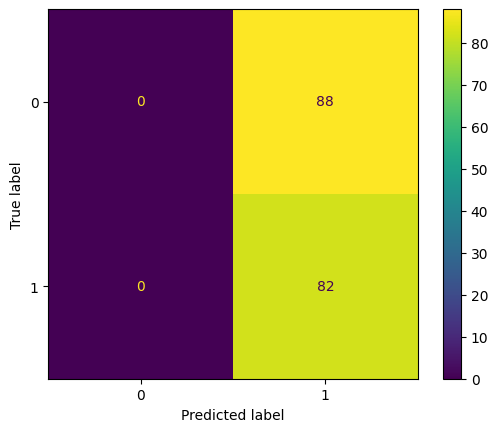

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl2.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### LinearSVC

In [ ]:
from sklearn.svm import LinearSVC as Nws_Fkelisv

Nws_parm = { 'penalty': ['l1','l2'],
               'loss': ['squared_hinge','hinge'],
               'C':[2.0,3.0,4.0,5.0]}


Nws_parm_Vo = Nws_Fkelisv(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2; 1/16] START C=2.0, loss=squared_hinge, penalty=l1......................
[CV 1/2; 1/16] END C=2.0, loss=squared_hinge, penalty=l1;, score=nan total time=   0.0s
[CV 2/2; 1/16] START C=2.0, loss=squared_hinge, penalty=l1......................
[CV 2/2; 1/16] END C=2.0, loss=squared_hinge, penalty=l1;, score=nan total time=   0.0s
[CV 1/2; 2/16] START C=2.0, loss=squared_hinge, penalty=l2......................
[CV 1/2; 2/16] END C=2.0, loss=squared_hinge, penalty=l2;, score=0.680 total time=   0.0s
[CV 2/2; 2/16] START C=2.0, loss=squared_hinge, penalty=l2......................
[CV 2/2; 2/16] END C=2.0, loss=squared_hinge, penalty=l2;, score=0.560 total time=   0.0s
[CV 1/2; 3/16] START C=2.0, loss=hinge, penalty=l1..............................
[CV 1/2; 3/16] END .C=2.0, loss=hinge, penalty=l1;, score=nan total time=   0.0s
[CV 2/2; 3/16] START C=2.0, loss=hinge, penalty=l1..............................
[CV 2/2; 3/16] E


 training period: 0.011208057403564453 

              precision    recall  f1-score   support

           0       0.48      0.45      0.47        82
           1       0.51      0.54      0.53        87

    accuracy                           0.50       169
   macro avg       0.50      0.50      0.50       169
weighted avg       0.50      0.50      0.50       169


 validation period: 0.12297439575195312 



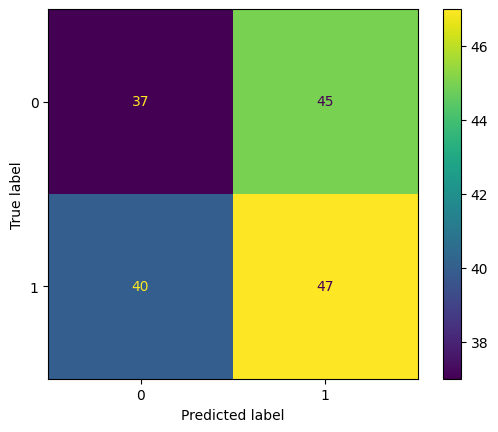

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl3= Nws_Fkelisv(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl3.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl3.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.47      0.41      0.44        88
           1       0.45      0.51      0.48        82

    accuracy                           0.46       170
   macro avg       0.46      0.46      0.46       170
weighted avg       0.46      0.46      0.46       170


 testing period: 0.22439885139465332 



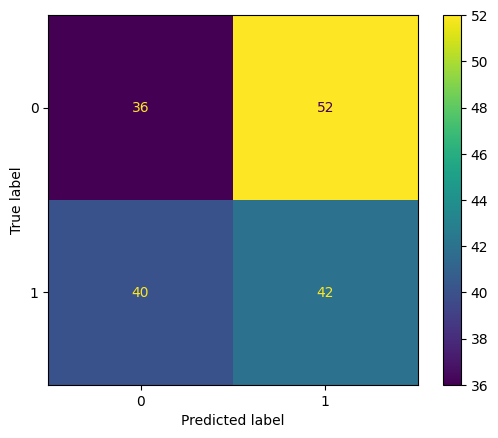

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl3.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

### Boosting models

#### XGBM

In [ ]:
from xgboost import XGBClassifier as Nws_Fkexgrb

Nws_parm = { 'subsample': [0.03,0.07,0.08,0.06],
              'learning_rate': [0.01,0.02,0.04,0.05],
              'n_estimators':[20,30,40,50,60]}


Nws_parm_Vo = Nws_Fkexgrb(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 80 candidates, totalling 160 fits
[CV 1/2; 1/80] START learning_rate=0.01, n_estimators=20, subsample=0.03........
[CV 1/2; 1/80] END learning_rate=0.01, n_estimators=20, subsample=0.03;, score=0.520 total time=   0.3s
[CV 2/2; 1/80] START learning_rate=0.01, n_estimators=20, subsample=0.03........
[CV 2/2; 1/80] END learning_rate=0.01, n_estimators=20, subsample=0.03;, score=0.500 total time=   0.1s
[CV 1/2; 2/80] START learning_rate=0.01, n_estimators=20, subsample=0.07........
[CV 1/2; 2/80] END learning_rate=0.01, n_estimators=20, subsample=0.07;, score=0.480 total time=   0.1s
[CV 2/2; 2/80] START learning_rate=0.01, n_estimators=20, subsample=0.07........
[CV 2/2; 2/80] END learning_rate=0.01, n_estimators=20, subsample=0.07;, score=0.500 total time=   0.3s
[CV 1/2; 3/80] START learning_rate=0.01, n_estimators=20, subsample=0.08........
[CV 1/2; 3/80] END learning_rate=0.01, n_estimators=20, subsample=0.08;, score=0.480 total time=   0.0s
[CV 2/2; 3/80


 training period: 0.02401900291442871 

              precision    recall  f1-score   support

           0       0.51      0.33      0.40        82
           1       0.53      0.70      0.60        87

    accuracy                           0.52       169
   macro avg       0.52      0.52      0.50       169
weighted avg       0.52      0.52      0.50       169


 validation period: 0.06748151779174805 



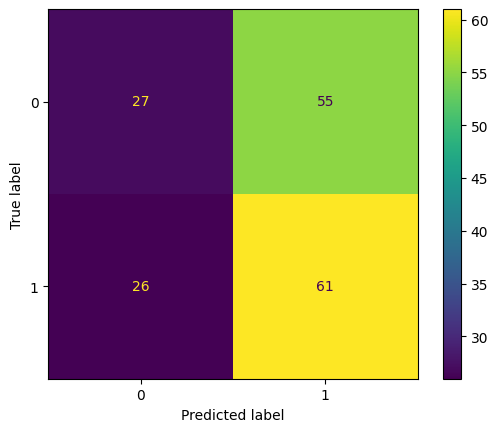

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl4= Nws_Fkexgrb(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl4.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl4.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.44      0.31      0.36        88
           1       0.44      0.59      0.50        82

    accuracy                           0.44       170
   macro avg       0.44      0.45      0.43       170
weighted avg       0.44      0.44      0.43       170


 testing period: 0.06263017654418945 



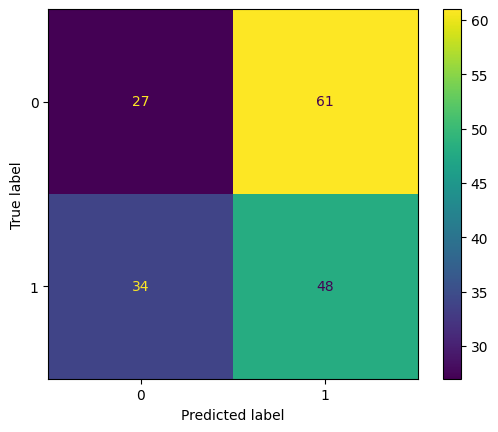

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl4.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### LightGBM

In [ ]:
from lightgbm import LGBMClassifier as Nws_Fkeligb

Nws_parm = { 'num_leaves': [2,4,6,8],
              'max_depth': [3,5,7,9],
              'n_estimators':[10,30,40,50,60]}


Nws_parm_Vo = Nws_Fkeligb(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Streaming output truncated to the last 5000 lines.
[CV 2/2; 15/80] END max_depth=3, n_estimators=50, num_leaves=6;, score=0.600 total time=   0.0s
[CV 1/2; 16/80] START max_depth=3, n_estimators=50, num_leaves=8................
[LightGBM] [Info] Number of positive: 25, number of negative: 25
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 469
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Info] Number of positive: 254, number of negative: 253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4401
[LightGBM] [Info] Number of data points in the train set: 507, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500986 -> initscore=0.003945
[LightGBM] [Info] Start training from score 0.003945

 training period: 0.023683547973632812 

              precision    recall  f1-score   support

           0       0.54      0.59      0.56        82
           1       0.57      0.53      0.55        87

    accuracy                           0.56       169
   macro avg       0.56      0.56      0.56       169
weighted avg       0.56      0.56      0.56       169


 validation period: 0.05934929847717285 



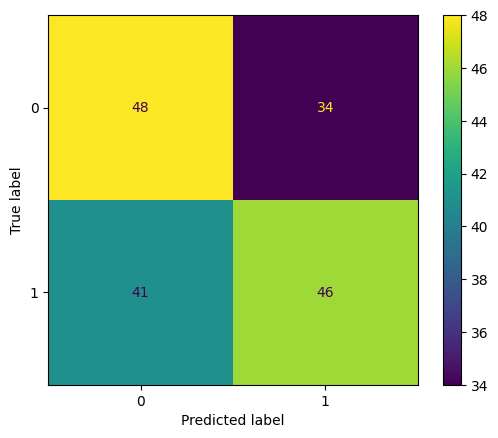

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl5= Nws_Fkeligb(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl5.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl5.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.48      0.45      0.47        88
           1       0.44      0.46      0.45        82

    accuracy                           0.46       170
   macro avg       0.46      0.46      0.46       170
weighted avg       0.46      0.46      0.46       170


 testing period: 0.06023907661437988 



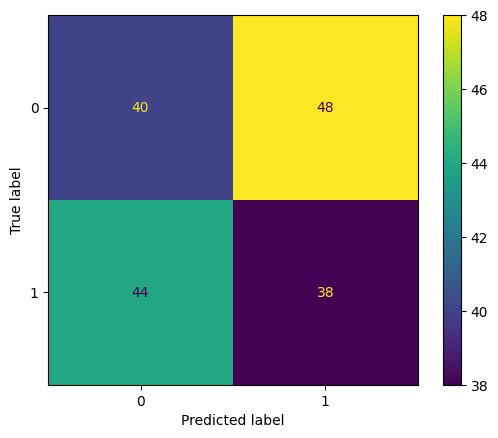

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl5.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### CatBoost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier as Nws_Fkecttb

Nws_parm = { 'learning_rate': [0.01,0.02,0.03,0.04],
              'n_estimators': [10,20,40,70],
              'max_depth':[3,5,6,8]}


Nws_parm_Vo = Nws_Fkecttb(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 64 candidates, totalling 128 fits
[CV 1/2; 1/64] START learning_rate=0.01, max_depth=3, n_estimators=10...........
0:	learn: 0.6907838	total: 47.6ms	remaining: 428ms
1:	learn: 0.6861330	total: 49.1ms	remaining: 196ms
2:	learn: 0.6835978	total: 50.6ms	remaining: 118ms
3:	learn: 0.6802687	total: 54.5ms	remaining: 81.8ms
4:	learn: 0.6774686	total: 57.3ms	remaining: 57.3ms
5:	learn: 0.6737764	total: 58.9ms	remaining: 39.2ms
6:	learn: 0.6705895	total: 61.1ms	remaining: 26.2ms
7:	learn: 0.6651018	total: 63ms	remaining: 15.7ms
8:	learn: 0.6623628	total: 65.9ms	remaining: 7.32ms
9:	learn: 0.6588696	total: 67.3ms	remaining: 0us
[CV 1/2; 1/64] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.600 total time=   0.1s
[CV 2/2; 1/64] START learning_rate=0.01, max_depth=3, n_estimators=10...........
0:	learn: 0.6907139	total: 908us	remaining: 8.18ms
1:	learn: 0.6876370	total: 2.62ms	remaining: 10.5ms
2:	learn: 0.6839943	total: 4.15ms	remaining: 9.68ms
3:	learn

0:	learn: 0.6892609	total: 22.4ms	remaining: 1.54s
1:	learn: 0.6843966	total: 36.2ms	remaining: 1.23s
2:	learn: 0.6809274	total: 54.7ms	remaining: 1.22s
3:	learn: 0.6770281	total: 71.6ms	remaining: 1.18s
4:	learn: 0.6724201	total: 86.8ms	remaining: 1.13s
5:	learn: 0.6696796	total: 102ms	remaining: 1.09s
6:	learn: 0.6644365	total: 117ms	remaining: 1.05s
7:	learn: 0.6604937	total: 132ms	remaining: 1.02s
8:	learn: 0.6553173	total: 147ms	remaining: 994ms
9:	learn: 0.6491480	total: 166ms	remaining: 998ms
10:	learn: 0.6448457	total: 182ms	remaining: 978ms
11:	learn: 0.6421656	total: 198ms	remaining: 958ms
12:	learn: 0.6374577	total: 214ms	remaining: 940ms
13:	learn: 0.6328276	total: 239ms	remaining: 956ms
14:	learn: 0.6284528	total: 252ms	remaining: 924ms
15:	learn: 0.6255173	total: 265ms	remaining: 893ms
16:	learn: 0.6204201	total: 280ms	remaining: 874ms
17:	learn: 0.6158826	total: 297ms	remaining: 857ms
18:	learn: 0.6136431	total: 313ms	remaining: 839ms
19:	learn: 0.6094046	total: 329ms	re

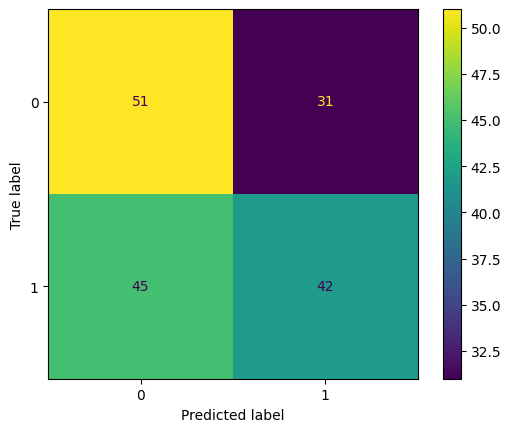

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl6= Nws_Fkecttb(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl6.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl6.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.52      0.49      0.51        88
           1       0.49      0.52      0.51        82

    accuracy                           0.51       170
   macro avg       0.51      0.51      0.51       170
weighted avg       0.51      0.51      0.51       170


 testing period: 0.09783315658569336 



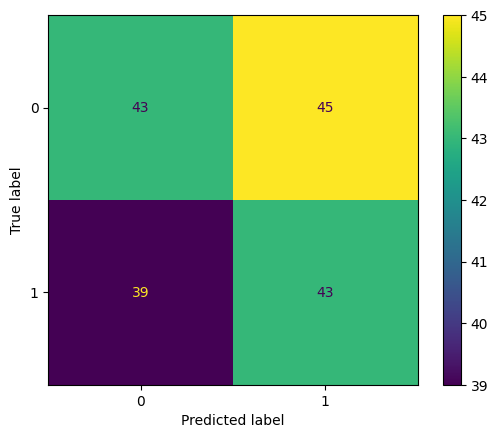

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl6.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")